In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import fractional_matrix_power

import warnings
warnings.filterwarnings("ignore", category=UserWarning)


#Initialize the graph
G = nx.Graph(name='G')

#Create nodes
#In this example, the graph will consist of 6 nodes.
#Each node is assigned node feature which corresponds to the node name
for i in range(6):
    G.add_node(i, name=i)


#Define the edges and the edges to the graph
edges = [(0,1),(0,2),(1,2),(0,3),(3,4),(3,5),(4,5)]
G.add_edges_from(edges)

#See graph info
print('Graph Info:\n', nx.info(G))

#Inspect the node features
print('\nGraph Nodes: ', G.nodes.data())

#Plot the graph
nx.draw(G, with_labels=True, font_weight='bold')
plt.show()

Graph Info:
 Name: G
Type: Graph
Number of nodes: 6
Number of edges: 7
Average degree:   2.3333

Graph Nodes:  [(0, {'name': 0}), (1, {'name': 1}), (2, {'name': 2}), (3, {'name': 3}), (4, {'name': 4}), (5, {'name': 5})]


<Figure size 640x480 with 1 Axes>

In [3]:
import tensorflow as tf
tf.__version__

'2.0.0'

In [2]:
#Get the Adjacency Matrix (A) and Node Features Matrix (X) as numpy array
A = np.array(nx.attr_matrix(G, node_attr='name')[0])
X = np.array(nx.attr_matrix(G, node_attr='name')[1])
X = np.expand_dims(X,axis=1)

print('Shape of A: ', A.shape)
print('\nShape of X: ', X.shape)
print('\nAdjacency Matrix (A):\n', A)
print('\nNode Features Matrix (X):\n', X)

Shape of A:  (6, 6)

Shape of X:  (6, 1)

Adjacency Matrix (A):
 [[0. 1. 1. 1. 0. 0.]
 [1. 0. 1. 0. 0. 0.]
 [1. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 1. 1.]
 [0. 0. 0. 1. 0. 1.]
 [0. 0. 0. 1. 1. 0.]]

Node Features Matrix (X):
 [[0]
 [1]
 [2]
 [3]
 [4]
 [5]]


In [3]:

#Dot product Adjacency Matrix (A) and Node Features (X)
AX = np.dot(A,X)
print("Dot product of A and X (AX):\n", AX)

Dot product of A and X (AX):
 [[6.]
 [2.]
 [1.]
 [9.]
 [8.]
 [7.]]


In [4]:
#Add Self Loops
G_self_loops = G.copy()

self_loops = []
for i in range(G.number_of_nodes()):
    self_loops.append((i,i))

G_self_loops.add_edges_from(self_loops)

#Check the edges of G_self_loops after adding the self loops
print('Edges of G with self-loops:\n', G_self_loops.edges)

#Get the Adjacency Matrix (A) and Node Features Matrix (X) of added self-lopps graph
A_hat = np.array(nx.attr_matrix(G_self_loops, node_attr='name')[0])
print('Adjacency Matrix of added self-loops G (A_hat):\n', A_hat)
#! havent redone the X since its the same

#Calculate the dot product of A_hat and X (AX)
AX = np.dot(A_hat, X)
print('AX:\n', AX)

Edges of G with self-loops:
 [(0, 1), (0, 2), (0, 3), (0, 0), (1, 2), (1, 1), (2, 2), (3, 4), (3, 5), (3, 3), (4, 5), (4, 4), (5, 5)]
Adjacency Matrix of added self-loops G (A_hat):
 [[1. 1. 1. 1. 0. 0.]
 [1. 1. 1. 0. 0. 0.]
 [1. 1. 1. 0. 0. 0.]
 [1. 0. 0. 1. 1. 1.]
 [0. 0. 0. 1. 1. 1.]
 [0. 0. 0. 1. 1. 1.]]
AX:
 [[ 6.]
 [ 3.]
 [ 3.]
 [12.]
 [12.]
 [12.]]


In [5]:
#Get the Degree Matrix of the added self-loops graph
Deg_Mat = G_self_loops.degree()
#print(type(Deg_Mat))
print('Degree Matrix of added self-loops G (D): ', Deg_Mat)

#Convert the Degree Matrix to a N x N matrix where N is the number of nodes
D = np.diag([deg for (n,deg) in list(Deg_Mat)])
#I = np.identity(D.shape[0]) #i added
#D=D-I #i added
print('Degree Matrix of added self-loops G as numpy array (D):\n', D)

#Find the inverse of Degree Matrix (D)
D_inv = np.linalg.inv(D)
print('Inverse of D:\n', D_inv)

#Dot product of D and AX for normalization
DAX = np.dot(D_inv,AX)
print('DAX:\n', DAX)

Degree Matrix of added self-loops G (D):  [(0, 5), (1, 4), (2, 4), (3, 5), (4, 4), (5, 4)]
Degree Matrix of added self-loops G as numpy array (D):
 [[5 0 0 0 0 0]
 [0 4 0 0 0 0]
 [0 0 4 0 0 0]
 [0 0 0 5 0 0]
 [0 0 0 0 4 0]
 [0 0 0 0 0 4]]
Inverse of D:
 [[ 0.2   0.    0.    0.    0.    0.  ]
 [ 0.    0.25  0.    0.    0.    0.  ]
 [ 0.    0.    0.25  0.    0.    0.  ]
 [-0.   -0.   -0.    0.2  -0.   -0.  ]
 [ 0.    0.    0.    0.    0.25  0.  ]
 [ 0.    0.    0.    0.    0.    0.25]]
DAX:
 [[1.2 ]
 [0.75]
 [0.75]
 [2.4 ]
 [3.  ]
 [3.  ]]


why is that D matrix have more than 1 edges added to each node??(after considering the node-node connection as well) is it because the node - node is counted twice??  

In [6]:

#Symmetrically-normalization
D_half_norm = fractional_matrix_power(D, -0.5)#! funtcion is from scipy
DADX = D_half_norm.dot(A_hat).dot(D_half_norm).dot(X)
print('DADX:\n', DADX)

DADX:
 [[1.27082039]
 [0.75      ]
 [0.75      ]
 [2.61246118]
 [2.92082039]
 [2.92082039]]


In [7]:
#not related to the main code
#some testing for dot product
X.shape[1]
array_a = np.arange(24).reshape(4,6)
array_b=np.arange(24).reshape(6,4)
test=np.arange(4).reshape(4,1)
kk=np.dot(array_a,array_b)
"""above is like array_a *array_b
not necesary to worry much
"""
mm=array_a.dot(array_b)
print('array_a: ',array_a.shape,'\narray_b: ',array_b.shape,'\nkk: ',kk.shape,'\n',kk,'\nmm: ',mm)
#print(mm-kk)

array_a:  (4, 6) 
array_b:  (6, 4) 
kk:  (4, 4) 
 [[ 220  235  250  265]
 [ 580  631  682  733]
 [ 940 1027 1114 1201]
 [1300 1423 1546 1669]] 
mm:  [[ 220  235  250  265]
 [ 580  631  682  733]
 [ 940 1027 1114 1201]
 [1300 1423 1546 1669]]


In [8]:
#not related to the main code
#some testing for sum func
I = np.identity(A.shape[0])
A_hat=A+I
print(A_hat)
ttt=np.sum(A_hat, axis=0)
print(ttt.shape)
print(ttt)
DDD = np.diag(np.sum(A_hat, axis=0)) #create Degree Matrix of A
print(DDD.shape)
print(DDD)

[[1. 1. 1. 1. 0. 0.]
 [1. 1. 1. 0. 0. 0.]
 [1. 1. 1. 0. 0. 0.]
 [1. 0. 0. 1. 1. 1.]
 [0. 0. 0. 1. 1. 1.]
 [0. 0. 0. 1. 1. 1.]]
(6,)
[4. 3. 3. 4. 3. 3.]
(6, 6)
[[4. 0. 0. 0. 0. 0.]
 [0. 3. 0. 0. 0. 0.]
 [0. 0. 3. 0. 0. 0.]
 [0. 0. 0. 4. 0. 0.]
 [0. 0. 0. 0. 3. 0.]
 [0. 0. 0. 0. 0. 3.]]


In [15]:
#Initialize the weights
np.random.seed(77777)
n_h = 4 #number of neurons in the hidden layer
n_y = 2 #number of neurons in the output layer
W0 = np.random.randn(X.shape[1],n_h) * 0.01
print(W0.shape)
W1 = np.random.randn(n_h,n_y) * 0.01
print(W1.shape)

#Implement ReLu as activation function
def relu(x):
    return np.maximum(0,x)

#Build GCN layer
#In this function, we implement numpy to simplify
def gcn(A,H,W):
    I = np.identity(A.shape[0]) #create Identity Matrix of A
    print('H:',H,'end')
    A_hat = A + I #add self-loop to A i have multiplyed by two since self loop represent two connections?
    print('A_hat: ',A_hat,'end')
    D = np.diag(np.sum(A_hat, axis=0)) #create Degree Matrix of A
    print('D:',D, 'end',D.shape)
    D_half_norm = fractional_matrix_power(D, -.5) #calculate D to the power of -0.5
    print(type(D_half_norm))
    print(D_half_norm)
    eq = D_half_norm.dot(A_hat).dot(D_half_norm).dot(H).dot(W)
    print('eq: {} lol'.format(eq))
    return relu(eq)


#Do forward propagation
H1 = gcn(A,X,W0)
H2 = gcn(A,H1,W1)
print('Features Representation from GCN output:\n', H2)

(1, 4)
(4, 2)
H: [[0]
 [1]
 [2]
 [3]
 [4]
 [5]] end
A_hat:  [[2. 1. 1. 1. 0. 0.]
 [1. 2. 1. 0. 0. 0.]
 [1. 1. 2. 0. 0. 0.]
 [1. 0. 0. 2. 1. 1.]
 [0. 0. 0. 1. 2. 1.]
 [0. 0. 0. 1. 1. 2.]] end
D: [[5. 0. 0. 0. 0. 0.]
 [0. 4. 0. 0. 0. 0.]
 [0. 0. 4. 0. 0. 0.]
 [0. 0. 0. 5. 0. 0.]
 [0. 0. 0. 0. 4. 0.]
 [0. 0. 0. 0. 0. 4.]] end (6, 6)
<class 'numpy.ndarray'>
[[0.4472136 0.        0.        0.        0.        0.       ]
 [0.        0.5       0.        0.        0.        0.       ]
 [0.        0.        0.5       0.        0.        0.       ]
 [0.        0.        0.        0.4472136 0.        0.       ]
 [0.        0.        0.        0.        0.5       0.       ]
 [0.        0.        0.        0.        0.        0.5      ]]
eq: [[ 0.0026616  -0.00823941  0.0107974   0.00082675]
 [ 0.0020944  -0.00648353  0.0084964   0.00065057]
 [ 0.002618   -0.00810442  0.0106205   0.00081321]
 [ 0.00672818 -0.0208281   0.02729436  0.00208992]
 [ 0.00821176 -0.02542077  0.03331286  0.00255075]
 [ 0.0

In [10]:
print(W0.shape)
print(W1.shape)
np.diag

(1, 4)
(4, 2)


<function numpy.diag(v, k=0)>

[0.00025247 0.        ]    0 

[0.00016741 0.        ]    1 

[0.00017695 0.        ]    2 

[0.00051115 0.        ]    3 

[0.00056808 0.        ]    4 

[0.00057762 0.        ]    5 



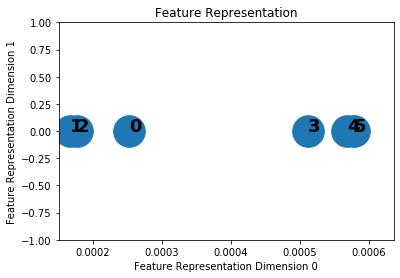

In [16]:
def plot_features(H2):
    #Plot the features representation
    x = H2[:,0]
    y = H2[:,1]

    size = 1000

    plt.scatter(x,y,size)
    plt.xlim([np.min(x)*0.9, np.max(x)*1.1])
    plt.ylim([-1, 1])
    plt.xlabel('Feature Representation Dimension 0')
    plt.ylabel('Feature Representation Dimension 1')
    plt.title('Feature Representation')

    for i,row in enumerate(H2):
        str = "{}".format(i)
        print(row,'  ',i,'\n') #should know these by practice i guess
        plt.annotate(str, (row[0],row[1]),fontsize=18, fontweight='bold')

    plt.show()


plot_features(H2)